<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Hyperparameter Tuning

## *Data Science Unit 4 Sprint 2 Assignment 4*

## Your Mission, should you choose to accept it...

To hyperparameter tune and extract every ounce of accuracy out of this telecom customer churn dataset: [Available Here](https://lambdaschool-data-science.s3.amazonaws.com/telco-churn/WA_Fn-UseC_-Telco-Customer-Churn+(1).csv)

## Requirements

- Load the data
- Clean the data if necessary (it will be)
- Create and fit a baseline Keras MLP model to the data.
- Hyperparameter tune (at least) the following parameters:
 - batch_size
 - training epochs
 - optimizer
 - learning rate (if applicable to optimizer)
 - momentum (if applicable to optimizer)
 - activation functions
 - network weight initialization
 - dropout regularization
 - number of neurons in the hidden layer
 
 You must use Grid Search and Cross Validation for your initial pass of the above hyperparameters
 
 Try and get the maximum accuracy possible out of this data! You'll save big telecoms millions! Doesn't that sound great?


In [1]:
import pandas as pd

In [2]:
##### Your Code Here #####

# loading the data

import pandas as pd

df = pd.read_csv("./customer_churn_communication_company.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# dropping unnecessary customer Id column
df = df.drop(columns='customerID')

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
import category_encoders as ce

In [6]:
# one-hot encode categorical columns that are not solely yes or no

one = ce.OneHotEncoder(cols = ['gender', 
                                'MultipleLines',
                                'InternetService',
                                'Contract',
                               'PaymentMethod',
                              "OnlineSecurity",
                               "OnlineBackup",
                               "DeviceProtection",
                               "TechSupport",
                               "StreamingTV",
                               "StreamingMovies"],
                      use_cat_names = True)

In [7]:
df = one.fit_transform(df)

df.head()

,gender_Female,gender_Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),MonthlyCharges,TotalCharges,Churn
0,1,0,0,Yes,No,1,No,1,0,0,...,0,0,Yes,1,0,0,0,29.85,29.85,No
1,0,1,0,No,No,34,Yes,0,1,0,...,1,0,No,0,1,0,0,56.95,1889.5,No
2,0,1,0,No,No,2,Yes,0,1,0,...,0,0,Yes,0,1,0,0,53.85,108.15,Yes
3,0,1,0,No,No,45,No,1,0,0,...,1,0,No,0,0,1,0,42.30,1840.75,No
4,1,0,0,No,No,2,Yes,0,1,0,...,0,0,Yes,1,0,0,0,70.70,151.65,Yes


In [8]:
# replace yes with 1 and no with 0

df = df.replace({"Yes": 1,
                "No": 0})

df.head()

,gender_Female,gender_Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0,1,0,1,0,0,...,0,0,1,1,0,0,0,29.85,29.85,0
1,0,1,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,56.95,1889.5,0
2,0,1,0,0,0,2,1,0,1,0,...,0,0,1,0,1,0,0,53.85,108.15,1
3,0,1,0,0,0,45,0,1,0,0,...,1,0,0,0,0,1,0,42.30,1840.75,0
4,1,0,0,0,0,2,1,0,1,0,...,0,0,1,1,0,0,0,70.70,151.65,1


In [9]:
df['TotalCharges'].describe(exclude='number')

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [10]:
df['TotalCharges'] = df['TotalCharges'].replace({" ":0})

In [11]:
# CHANGE TOTAL CHARGES TO INTEGER

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].dtype

dtype('float64')

In [12]:
# x and y data

x = df.loc[: , 'PhoneService':'TotalCharges']
x.head()

,PhoneService,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineSecurity_No internet service,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,1,0,0,...,1,0,0,1,1,0,0,0,29.85,29.85
1,1,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,56.95,1889.50
2,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,1,0,0,53.85,108.15
3,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,42.30,1840.75
4,1,0,1,0,0,1,0,1,0,0,...,1,0,0,1,1,0,0,0,70.70,151.65


In [13]:
y = df['Churn']
y[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [14]:
x.shape

(7043, 35)

In [15]:
# split into x and y

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2,
                                                   random_state=42,
                                                   stratify=y)

In [16]:
len(y_train)

5634

In [17]:
x_train.shape

(5634, 35)

In [18]:
pd.set_option('display.max_columns', 500)
df.head()

,gender_Female,gender_Male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineSecurity_No internet service,OnlineBackup_Yes,OnlineBackup_No,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_Yes,DeviceProtection_No internet service,TechSupport_No,TechSupport_Yes,TechSupport_No internet service,StreamingTV_No,StreamingTV_Yes,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_Yes,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,29.85,29.85,0
1,0,1,0,0,0,34,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,56.95,1889.50,0
2,0,1,0,0,0,2,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,53.85,108.15,1
3,0,1,0,0,0,45,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,42.30,1840.75,0
4,1,0,0,0,0,2,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,70.70,151.65,1


In [19]:
x_train.dtypes

PhoneService                                 int64
MultipleLines_No phone service               int64
MultipleLines_No                             int64
MultipleLines_Yes                            int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No                           int64
OnlineSecurity_No                            int64
OnlineSecurity_Yes                           int64
OnlineSecurity_No internet service           int64
OnlineBackup_Yes                             int64
OnlineBackup_No                              int64
OnlineBackup_No internet service             int64
DeviceProtection_No                          int64
DeviceProtection_Yes                         int64
DeviceProtection_No internet service         int64
TechSupport_No                               int64
TechSupport_Yes                              int64
TechSupport_No internet service              int64
StreamingTV_No                 

In [20]:
# standardizing the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [21]:
# initial tensorflow model. 

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# shape of input
inputs = x_train.shape[1]

# Create Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(inputs,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy'])

# Fit Model
results = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    epochs=100)

Epoch 1/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7643 - val_loss: 0.4453 - val_accuracy: 0.7779
Epoch 2/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8007 - val_loss: 0.4354 - val_accuracy: 0.7850
Epoch 3/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4164 - accuracy: 0.8048 - val_loss: 0.4347 - val_accuracy: 0.7949
Epoch 4/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8026 - val_loss: 0.4327 - val_accuracy: 0.7899
Epoch 5/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8067 - val_loss: 0.4340 - val_accuracy: 0.7814
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4061 - accuracy: 0.8072 - val_loss: 0.4369 - val_accuracy: 0.7800
Epoch 7/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8117 - val_loss: 0.4319 - val_accuracy: 0.7864

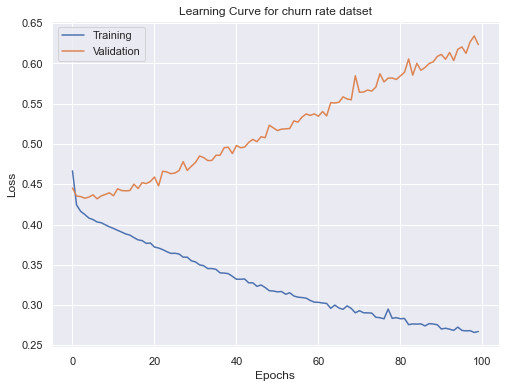

In [22]:
# initial graph

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(8,6))
plt.plot(results.history['loss'], label='Training')
plt.plot(results.history['val_loss'], label='Validation')
plt.title('Learning Curve for churn rate datset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

## Hyperparameter tunning


    batch_size
    training epochs
    optimizer
    learning rate (if applicable to optimizer)
    momentum (if applicable to optimizer)
    activation functions
    network weight initialization
    dropout regularization
    number of neurons in the hidden layer


In [23]:
# hyper parameter tuning

import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [24]:
y_train2 = np.array(y_train)
y_train2[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [25]:
y_train2.shape

(5634,)

In [28]:
## BATCH SIZE GRIDE SEARCH

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# shape of input
inputs = x_train.shape[1]

# Function to create model, required for KerasRegressor
def create_model():
    # Create Model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(inputs,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile Model
    model.compile(optimizer='adam', 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model
    
    
# Create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
param_grid = {'batch_size': [8, 16, 32, 64, 128],
              'epochs': [20]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(x_train, y_train)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: -0.7967672228813172 using {'batch_size': 128, 'epochs': 20}
Means: -0.7807934045791626, Stdev: 0.006411798913959693 with: {'batch_size': 8, 'epochs': 20}
Means: -0.7903762102127075, Stdev: 0.01581971260752432 with: {'batch_size': 16, 'epochs': 20}
Means: -0.7896681189537048, Stdev: 0.016480521613304697 with: {'batch_size': 32, 'epochs': 20}
Means: -0.7910868644714355, Stdev: 0.012266930397118032 with: {'batch_size': 64, 'epochs': 20}
Means: -0.7967672228813172, Stdev: 0.011269475439595887 with: {'batch_size': 128, 'epochs': 20}


In [30]:
# LEARNING RATE EXPERIMENT
from tensorflow.keras.optimizers import Adam

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# shape of input
inputs = x_train.shape[1]

# Function to create model, required for KerasRegressor
def create_model(lr=0.001):
    
    # Define Adam optimizer
    opt = Adam(learning_rate=lr)
    
    # Create Model
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(inputs,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile Model
    model.compile(optimizer=opt, 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model
    
    
# Create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
param_grid = {'lr': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.25],
              'batch_size': [64, 128, 256],
              'epochs': [20]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(x_train, y_train)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.8022704482078552 using {'batch_size': 256, 'epochs': 20, 'lr': 0.001}
Means: -0.7988964438438415, Stdev: 0.0177183288205335 with: {'batch_size': 64, 'epochs': 20, 'lr': 0.0001}
Means: -0.7971222996711731, Stdev: 0.015128344118385999 with: {'batch_size': 64, 'epochs': 20, 'lr': 0.001}
Means: -0.7901992321014404, Stdev: 0.012283111887178873 with: {'batch_size': 64, 'epochs': 20, 'lr': 0.01}
Means: -0.7781340122222901, Stdev: 0.025255196112793737 with: {'batch_size': 64, 'epochs': 20, 'lr': 0.05}
Means: -0.7554104685783386, Stdev: 0.03046314259527824 with: {'batch_size': 64, 'epochs': 20, 'lr': 0.1}
Means: -0.7365994691848755, Stdev: 0.013467919557731094 with: {'batch_size': 64, 'epochs': 20, 'lr': 0.25}
Means: -0.7969435811042785, Stdev: 0.018230893135773182 with: {'batch_size': 128, 'epochs': 20, 'lr': 0.0001}
Means: -0.799252963066101, Stdev: 0.014202214333149412 with: {'batch_size': 128, 'epochs': 20, 'lr': 0.001}
Means: -0.7831000924110413, Stdev: 0.019164468065595717 with: {

## Stretch Goals:

- Try to implement Random Search Hyperparameter Tuning on this dataset
- Try to implement Bayesian Optimiation tuning on this dataset using hyperas or hyperopt (if you're brave)
- Practice hyperparameter tuning other datasets that we have looked at. How high can you get MNIST? Above 99%?
- Study for the Sprint Challenge
 - Can you implement both perceptron and MLP models from scratch with forward and backpropagation?
 - Can you implement both perceptron and MLP models in keras and tune their hyperparameters with cross validation?